## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree

import graphviz

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [2]:
# Carregando a base de dados
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Visualizando o tipo dos dados e se tem dados faltantes
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Removendo os dados faltantes
housing = housing.dropna()
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [5]:
# Visualizando os dados da coluna do tipo "object"
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [6]:
# Removendo a coluna do tipo "object"
housing.drop('ocean_proximity', axis=1, inplace=True)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [7]:
# Visualizando a matriz de correlação
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


In [8]:
# Ordenando por relevelância a correlação com a vaiável Target (median_house_value)
correlacao = housing.corr()["median_house_value"].sort_values(ascending=False)

print("Correlação das variáveis com median_house_value:")
print(correlacao)

Correlação das variáveis com median_house_value:
median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64


In [9]:
# Ordenando correlações por valor absoluto
correlacao_abs = housing.corr()["median_house_value"].abs().sort_values(ascending=False)

print("Top 3 variáveis mais correlacionadas (por valor absoluto):")
print(correlacao_abs)

Top 3 variáveis mais correlacionadas (por valor absoluto):
median_house_value    1.000000
median_income         0.688355
latitude              0.144638
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
longitude             0.045398
population            0.025300
Name: median_house_value, dtype: float64


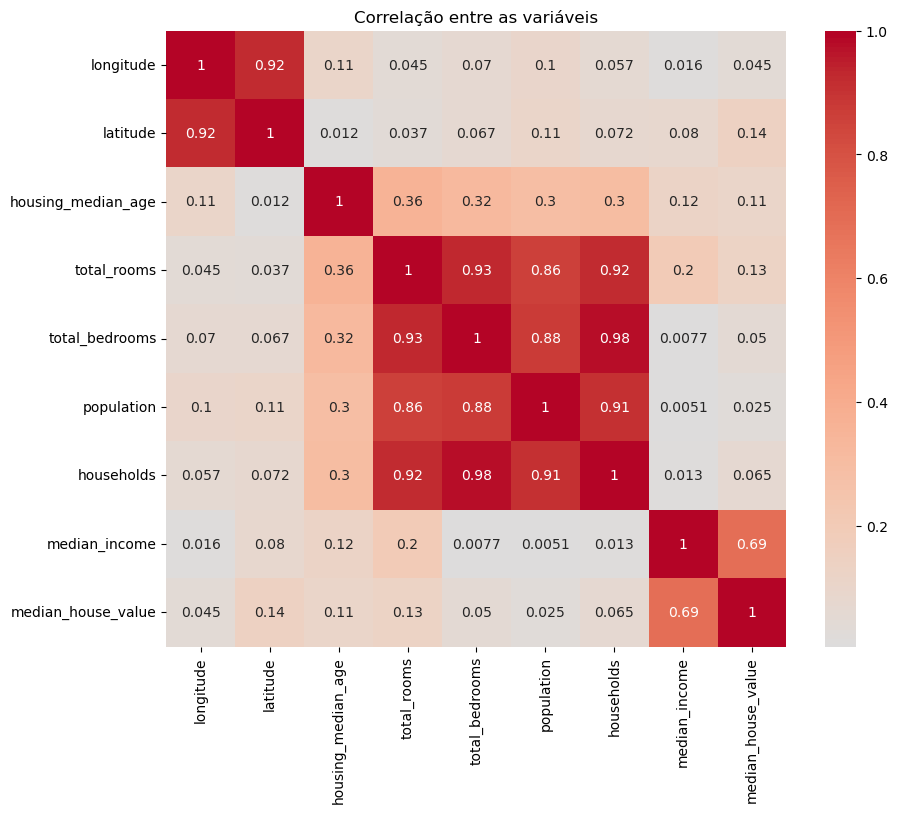

In [10]:
# Plotando mapa de calor da correlação
correlacao_matriz = housing.corr().abs()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao_matriz, annot=True, cmap="coolwarm", center=0)
plt.title("Correlação entre as variáveis")
plt.show()

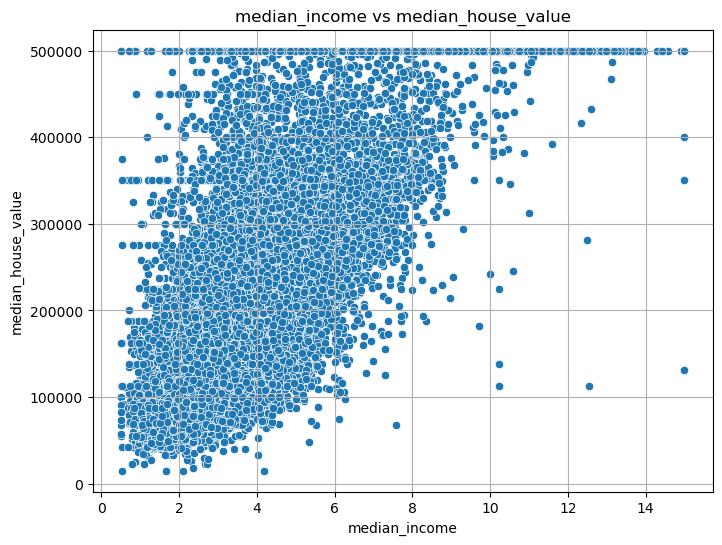

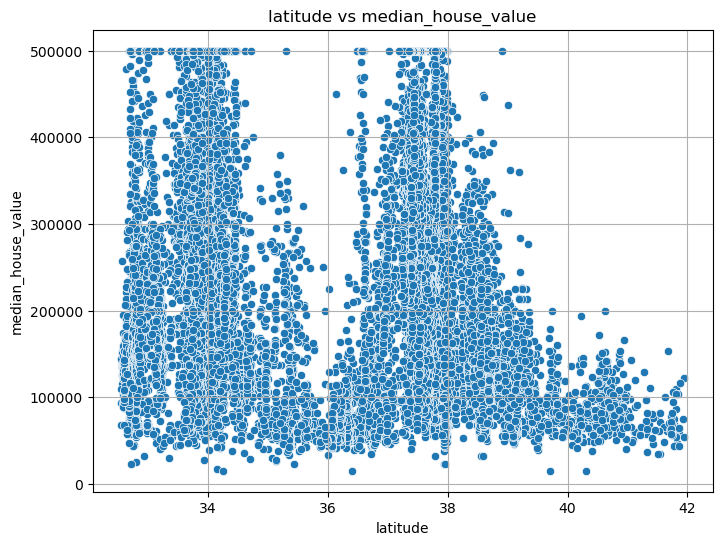

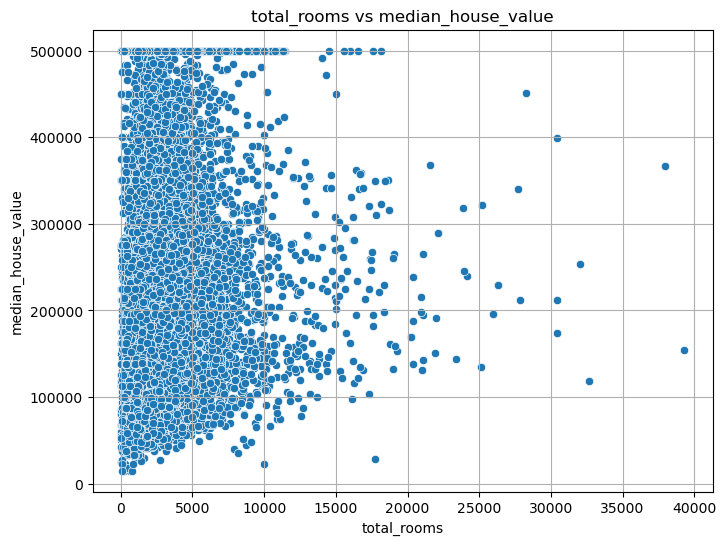

In [11]:
# Ordenando as correlações por valor absoluto
correlacao_abs = housing.corr()["median_house_value"].abs().sort_values(ascending=False)[1:4]

# Criando scatterplots das variáveis mais correlacionadas
for col in correlacao_abs.index:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=housing[col], y=housing["median_house_value"])
    plt.title(f"{col} vs median_house_value")
    plt.xlabel(col)
    plt.ylabel("median_house_value")
    plt.grid(True)
    plt.show()

In [12]:
# Separando dados em validação e teste
X = housing.drop(columns = ['median_house_value']).copy()

X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
dtypes: float64(8)
memory usage: 1.4 MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [13]:
y =  housing.loc[:,'median_house_value']

y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [15]:
# Treinando uma árvore com profundidade 2 e 8
arvore_regr_1 = DecisionTreeRegressor(max_depth=8)
arvore_regr_2 = DecisionTreeRegressor(max_depth=2)

arvore_regr_1.fit(X_train, y_train)
arvore_regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [16]:
# Calculando as previsões
y_pred_1 = arvore_regr_1.predict(X_train)

y_pred_2 = arvore_regr_2.predict(X_train)

In [17]:
# Calculando o MSE
mse_1 = mean_squared_error(y_train, y_pred_1)

mse_2 = mean_squared_error(y_train, y_pred_2)

In [18]:
# Calculando o R-quadrado
r_quadrado_1 = arvore_regr_1.score(X_train, y_train)
r_quadrado_2 = arvore_regr_2.score(X_train, y_train)

# Template para mostrar os resultados
template = "A árvore com profundidade={0} tem R-quadrado={1:.2f} e MSE={2:.2f}"

# Exibindo resultados
print(template.format(arvore_regr_1.get_depth(), r_quadrado_1, mse_1).replace(".",","))
print(template.format(arvore_regr_2.get_depth(), r_quadrado_2, mse_2).replace(".",","))

A árvore com profundidade=8 tem R-quadrado=0,76 e MSE=3225991009,13
A árvore com profundidade=2 tem R-quadrado=0,45 e MSE=7369471292,17


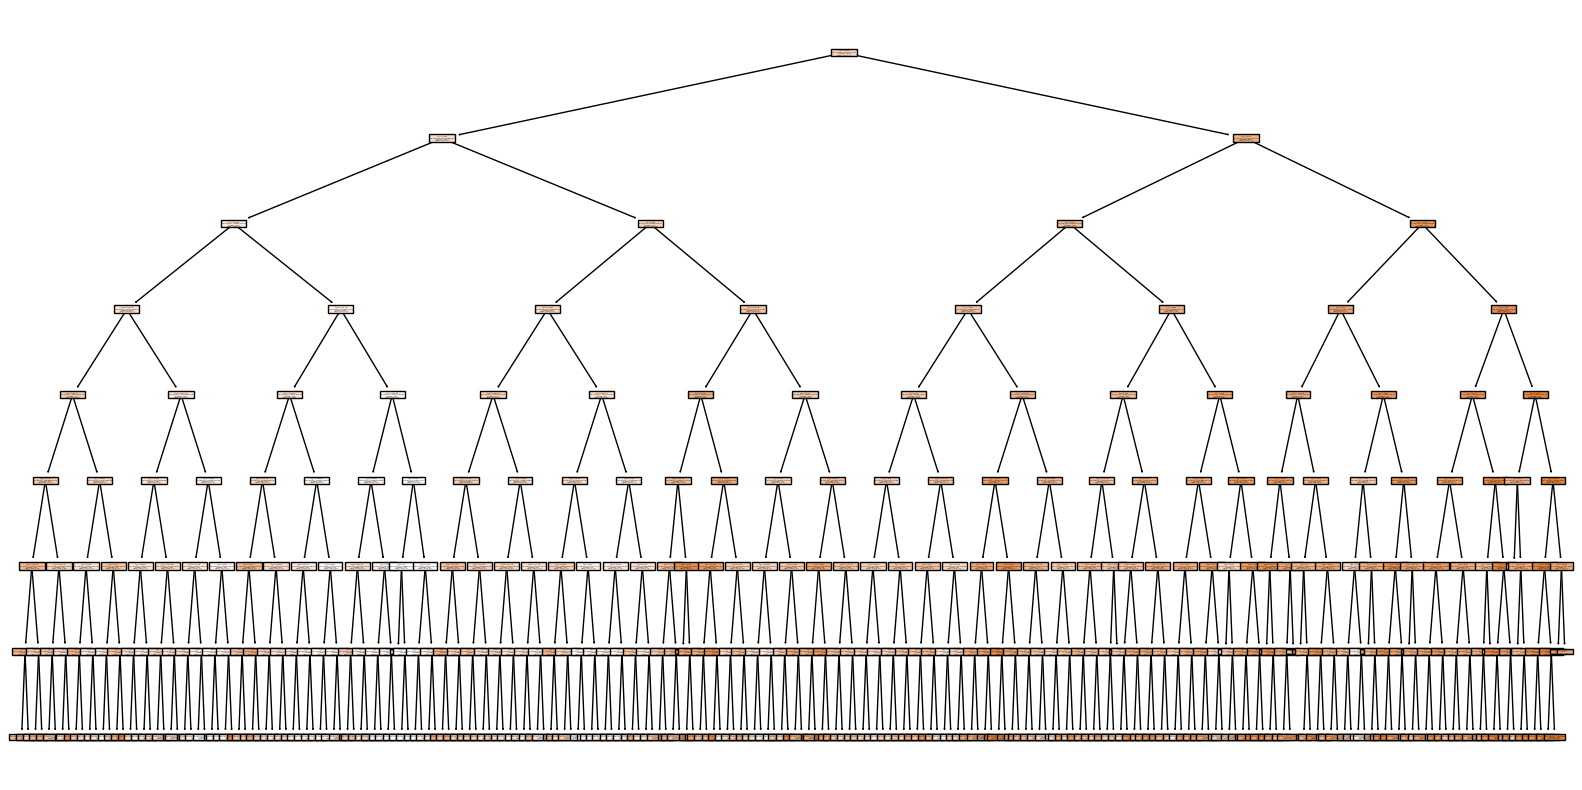

In [19]:
# Plotando a árvore de decisão
plt.rc('figure', figsize=(20, 10))
arv_reg_1 = tree.plot_tree(arvore_regr_1,  
                           filled=True)

In [20]:
# Representação textual
representacao_textual = tree.export_text(arvore_regr_1)
print(representacao_textual)

|--- feature_7 <= 5.04
|   |--- feature_7 <= 3.19
|   |   |--- feature_1 <= 34.45
|   |   |   |--- feature_0 <= -118.31
|   |   |   |   |--- feature_0 <= -118.35
|   |   |   |   |   |--- feature_1 <= 34.16
|   |   |   |   |   |   |--- feature_0 <= -118.38
|   |   |   |   |   |   |   |--- feature_7 <= 2.64
|   |   |   |   |   |   |   |   |--- value: [311394.53]
|   |   |   |   |   |   |   |--- feature_7 >  2.64
|   |   |   |   |   |   |   |   |--- value: [359787.86]
|   |   |   |   |   |   |--- feature_0 >  -118.38
|   |   |   |   |   |   |   |--- feature_1 <= 34.05
|   |   |   |   |   |   |   |   |--- value: [189865.71]
|   |   |   |   |   |   |   |--- feature_1 >  34.05
|   |   |   |   |   |   |   |   |--- value: [334584.32]
|   |   |   |   |   |--- feature_1 >  34.16
|   |   |   |   |   |   |--- feature_0 <= -119.42
|   |   |   |   |   |   |   |--- feature_2 <= 17.50
|   |   |   |   |   |   |   |   |--- value: [355967.00]
|   |   |   |   |   |   |   |--- feature_2 >  17.50
|   |   | 

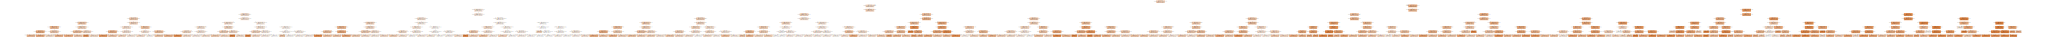

In [21]:
# DOT data
dot_data = tree.export_graphviz(arvore_regr_1, out_file=None, 
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

Em continuação ao exercício anterior, a melhor árvore, portanto, a escolhida para dar sequência aos exercícios, é a primeira, no caso, a com 8 de profundidade.

In [22]:
path = arvore_regr_1.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 4.71156356e+02, 6.12405377e+03, 3.48925999e+04,
        6.43226312e+04, 6.53286566e+04, 8.73157574e+04, 1.06010180e+05,
        1.17462803e+05, 1.36635931e+05, 1.46907139e+05, 1.83535630e+05,
        1.93169756e+05, 2.05627882e+05, 2.09483767e+05, 2.14245146e+05,
        2.22087997e+05, 2.28356500e+05, 2.86139824e+05, 2.98358235e+05,
        3.10069182e+05, 3.36647438e+05, 3.44213978e+05, 4.29465222e+05,
        4.79560144e+05, 4.99186518e+05, 5.56718894e+05, 6.01915976e+05,
        6.81688213e+05, 7.21448415e+05, 8.08211406e+05, 8.76430600e+05,
        9.45111723e+05, 1.03227598e+06, 1.05833690e+06, 1.08484929e+06,
        1.10302985e+06, 1.10876470e+06, 1.12823370e+06, 1.12962273e+06,
        1.20795464e+06, 1.22309824e+06, 1.23565528e+06, 1.24220110e+06,
        1.25510924e+06, 1.27228806e+06, 1.36295705e+06, 1.40641477e+06,
        1.40955364e+06, 1.42709503e+06, 1.42891766e+06, 1.43227646e+06,
        1.43460931e+06, 1.46738890e+06, 1.48322051

Text(0, 0.5, 'Impureza total das folhas')

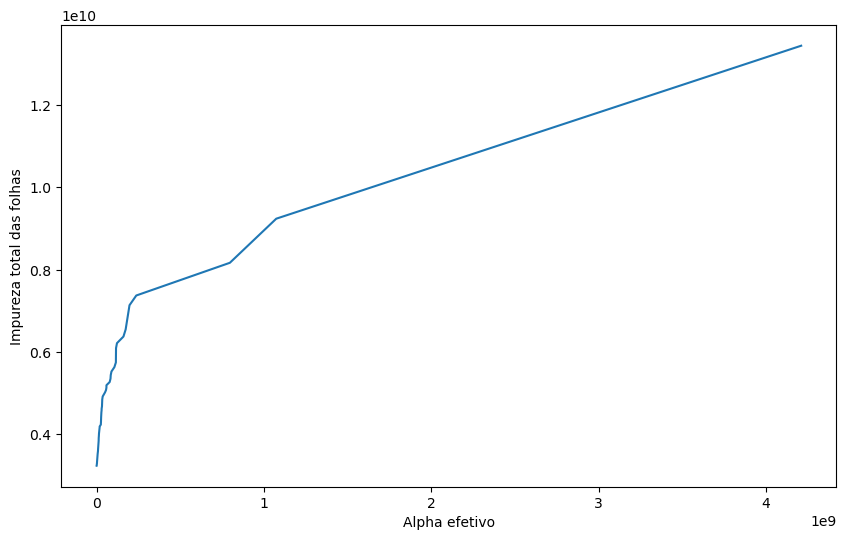

In [23]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [24]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=123, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

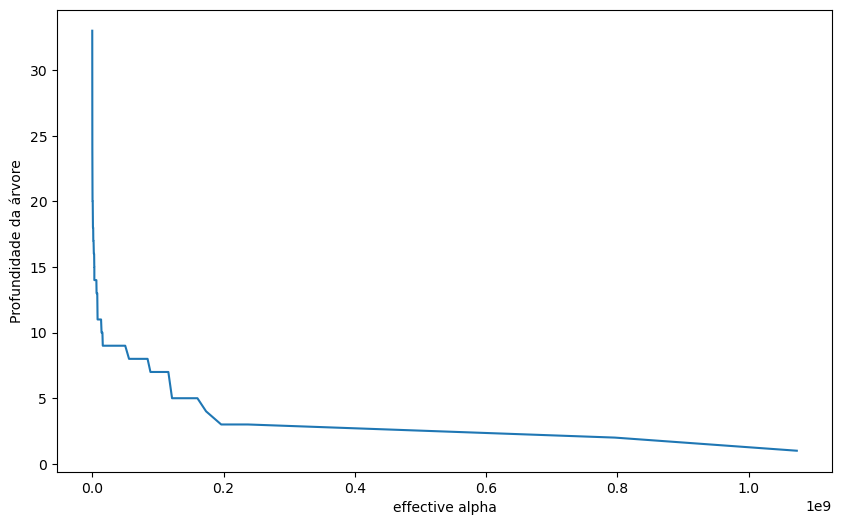

In [25]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [26]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

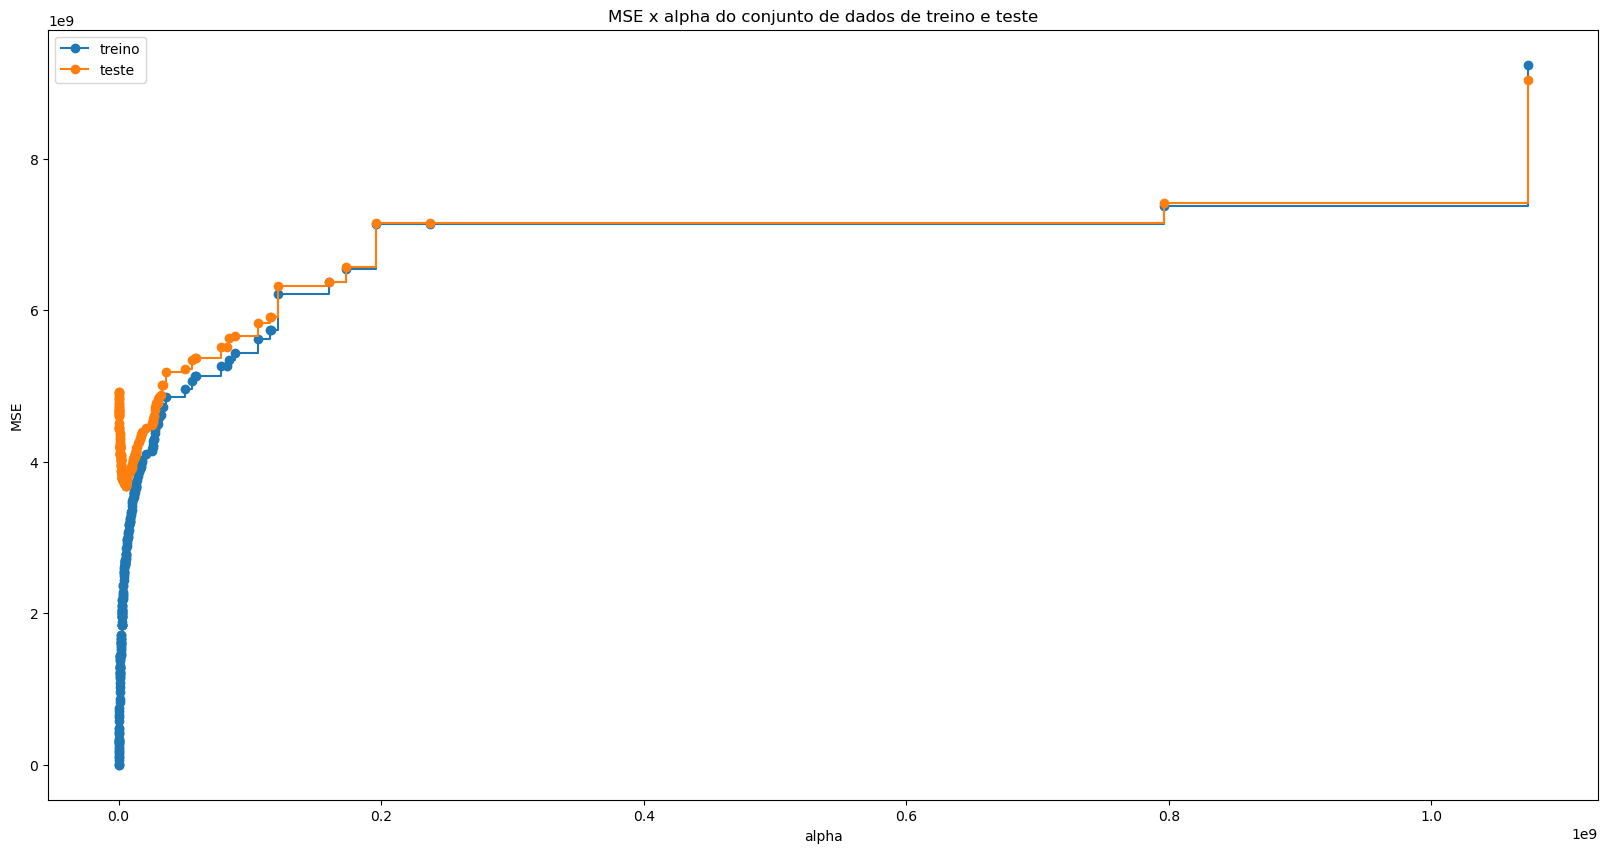

In [27]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [28]:
# Encontrar o menor valor de MSE no conjunto de teste
min_mse = min(test_scores)

# Encontrar o índice correspondente
min_index = test_scores.index(min_mse)

# Identificar o valor de alpha correspondente
alpha_ideal = ccp_alphas[min_index]

print(f"Menor MSE: {min_mse}")
print(f"Alpha correspondente: {alpha_ideal}")

Menor MSE: 3684773408.6625443
Alpha correspondente: 5528032.976122428


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [29]:
# Criar a árvore com o alpha encontrado
arvore_min_mse = DecisionTreeRegressor(ccp_alpha=alpha_ideal, random_state=123)
arvore_min_mse.fit(X_train, y_train)

# Calcular o R-quadrado no conjunto de teste
r2_score = arvore_min_mse.score(X_test, y_test)
print(f"R-quadrado no conjunto de teste: {r2_score:.4f}")

R-quadrado no conjunto de teste: 0.7155


### 7. Visualize esta árvore.

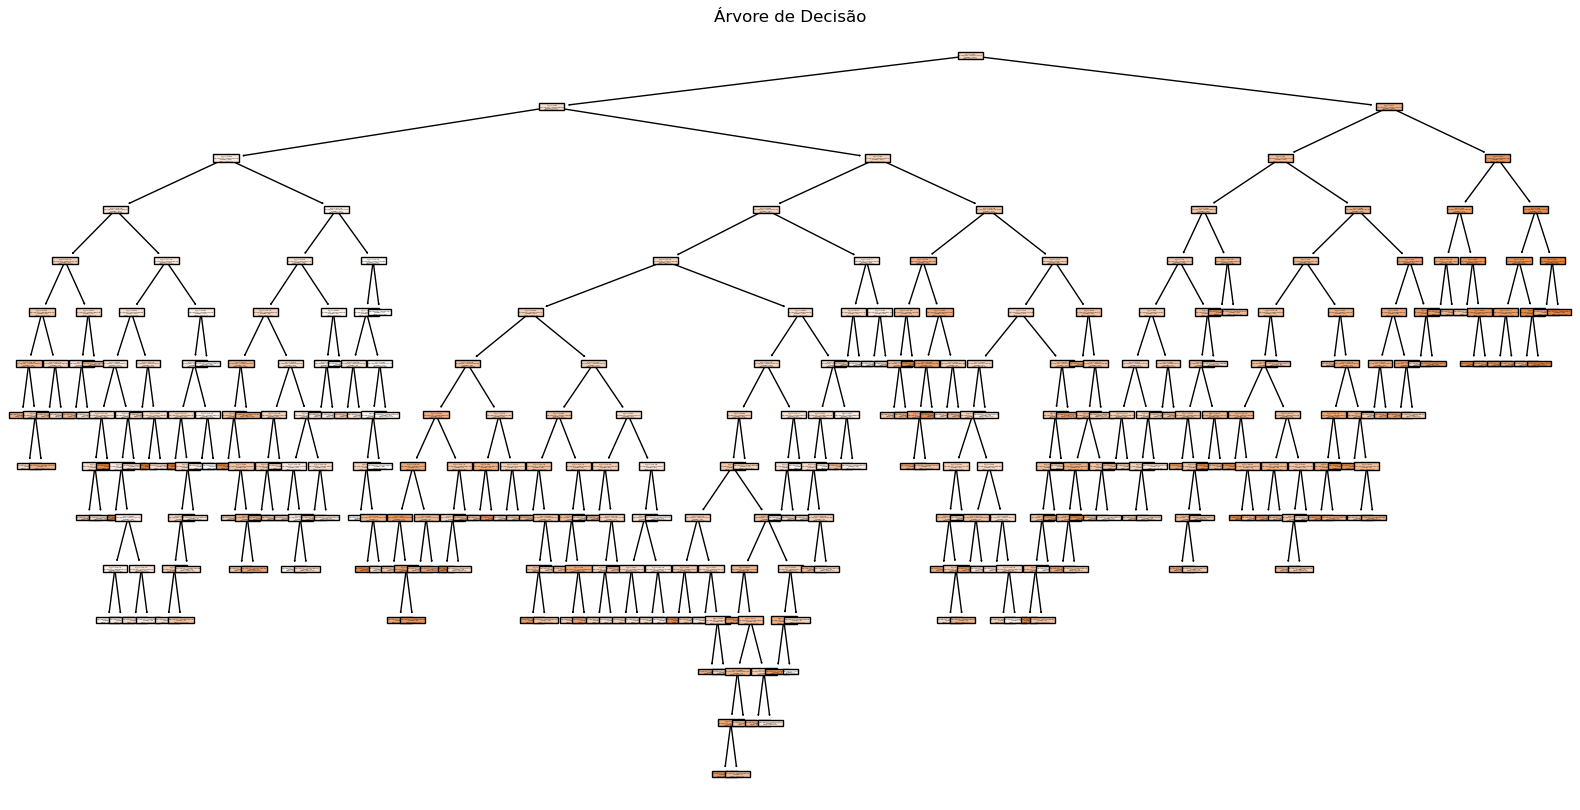

In [30]:
plt.figure(figsize=(20, 10))
plot_tree(arvore_min_mse, filled=True)
plt.title("Árvore de Decisão")
plt.show()

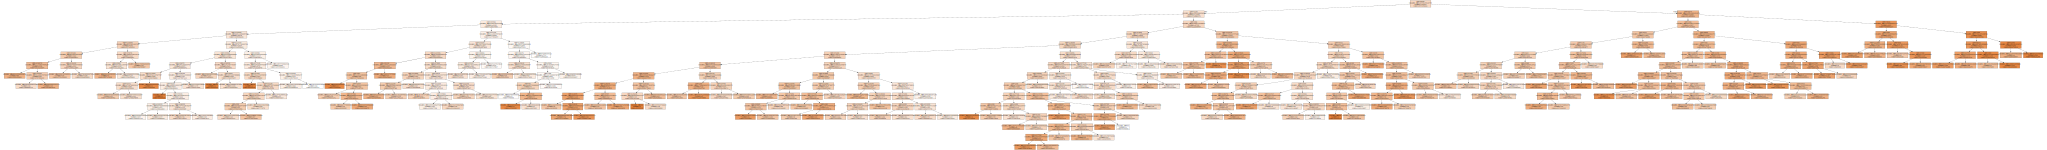

In [31]:
# DOT data
dot_data = tree.export_graphviz(arvore_min_mse, out_file=None, 
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph